첫번째 학습셋 입력:  유시민 검찰도 사법도 썩었지 vs 진중권 유시민 망상 대중은 현실로 믿어
첫번째 테스트셋 입력:  박준영 “도자기 집에서 사용” 김선교 “궁궐 살았나”
첫번째 학습셋 결과 one-hot 출력:  [1. 0. 0. 0.]
첫번째 테스트셋 결과 one-hot 출력:  [1. 0. 0. 0.]
학습셋 제목 최대 길이:  18
테스트셋 제목 최대 길이:  10
전체 데이터셋 단어 토큰 개수:  22844
첫번째 학습셋 토큰 결과:  [238, 7160, 7161, 7162, 122, 404, 238, 7163, 7164, 4269, 4270]
첫번째 테스트셋 토큰 결과:  [1200]
첫번째 학습셋 패딩 토큰:  [   0    0    0    0    0    0    0  238 7160 7161 7162  122  404  238
 7163 7164 4269 4270]
첫번째 테스트셋 패딩 토큰:  [   0    0    0    0    0    0    0    0    0 1200]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2284400   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     


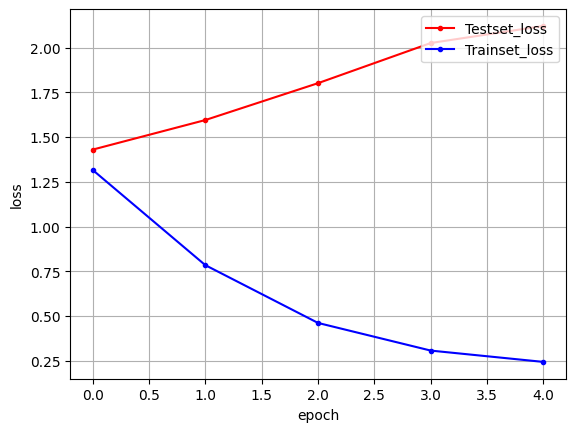

In [2]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 학습셋, 테스트셋 지정하기
train_data = pd.read_csv('/content/drive/MyDrive/24-1 인공지능/080228-master/실습12_자료/train_SectionDataset.csv', header=0)
x_train = train_data['title']
y_train = train_data['section']

test_data = pd.read_csv('/content/drive/MyDrive/24-1 인공지능/080228-master/실습12_자료/test_SectionDataset.csv', header=0)
x_test = test_data['title']
y_test = test_data['section']

# 데이터 확인하기
print("첫번째 학습셋 입력: ", x_train[0])
print("첫번째 테스트셋 입력: ", x_test[0])

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print("첫번째 학습셋 결과 one-hot 출력: ", y_train_onehot[0])
print("첫번째 테스트셋 결과 one-hot 출력: ", y_test_onehot[0])

# 토큰화 함수를 이용해 전처리.
token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(x_train)       # 토큰화 함수에 문장 적용

# 텍스트를 시퀀스로 변환
x_train_seq = token.texts_to_sequences(x_train)
x_test_seq = token.texts_to_sequences(x_test)

x_train_maxLen = max(len(l) for l in x_train_seq)
print("학습셋 제목 최대 길이: ", x_train_maxLen)
x_test_maxLen = max(len(l) for l in x_test_seq)
print("테스트셋 제목 최대 길이: ", x_test_maxLen)

# 임베딩에 입력될 단어의 수 지정
word_size = len(token.word_index) + 1 # 인덱스 0 사용 포함
print("전체 데이터셋 단어 토큰 개수: ", word_size)
print("첫번째 학습셋 토큰 결과: ", x_train_seq[0])
print("첫번째 테스트셋 토큰 결과: ", x_test_seq[0])

# 데이터 전처리
x_train_pad = pad_sequences(x_train_seq, maxlen=x_train_maxLen)
x_test_pad = pad_sequences(x_test_seq, maxlen=x_test_maxLen)

print("첫번째 학습셋 패딩 토큰: ", x_train_pad[0])
print("첫번째 테스트셋 패딩 토큰: ", x_test_pad[0])

# 모델의 설정
model = Sequential()
model.add(Embedding(word_size, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(4)) #
model.add(Activation('sigmoid'))
model.summary()

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',  # 다중 분류
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train_pad, y_train_onehot, batch_size=100, epochs=5, validation_data=(x_test_pad, y_test_onehot))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test_pad, y_test_onehot)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [3]:
# 실제 class와 CNN 딥러닝 모델의 예측 class 출력
y_prediction = model.predict(x_test_pad)

for i in range(10):
  print("\nindex: ", i, x_test[i])
  print("padded sequence: ", x_test_pad[i])
  print("예측 결과: ", y_prediction[i])

  # 가장 높은 예측 결과 찾기
  prediction = numpy.argmax(y_prediction[i], -1)
  label = numpy.argmax(y_test_onehot[i], -1)

  # 실제값과 예측값 출력
  print("Actual Class: {}, Expect Class: {}".format(label, prediction))

6/6 [==============================] - 0s 4ms/step

index:  0 박준영 “도자기 집에서 사용” 김선교 “궁궐 살았나”
padded sequence:  [   0    0    0    0    0    0    0    0    0 1200]
예측 결과:  [0.5123009  0.49253014 0.6027158  0.41085833]
Actual Class: 0, Expect Class: 2

index:  1 박준영 아내 도자기 의혹 사과...카페 운영 중단
padded sequence:  [    0     0     0     0  1359   359 11567  6036   284   128]
예측 결과:  [0.39632124 0.4625791  0.7379596  0.48920813]
Actual Class: 0, Expect Class: 2

index:  2 배우자 도자기 의혹 박준영 해당 카페 운영 않을 계획
padded sequence:  [   0    0    0    0  359 6024 6036  284 1427 2118]
예측 결과:  [0.21124262 0.59176016 0.5158295  0.8167034 ]
Actual Class: 0, Expect Class: 3

index:  3 박준영 도자기 밀수입 의혹 샹드리에 8개 궁궐에 살았나?
padded sequence:  [   0    0    0    0    0    0    0    0  359 5701]
예측 결과:  [0.5123009  0.49253014 0.6027158  0.41085833]
Actual Class: 0, Expect Class: 2

index:  4 김기현·여영국 與 동시 비판 언행불일치 내로남불
padded sequence:  [    0     0     0     0     0     0   166  1979  1396 20632]
예측 결과:  [0.9611356  0.6446765